In [1]:
pip install scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 20.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894086 sha256=179136b27594b21926ec995032502bb8eedc2acdb1b31bddd7cef4ee10057f80
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


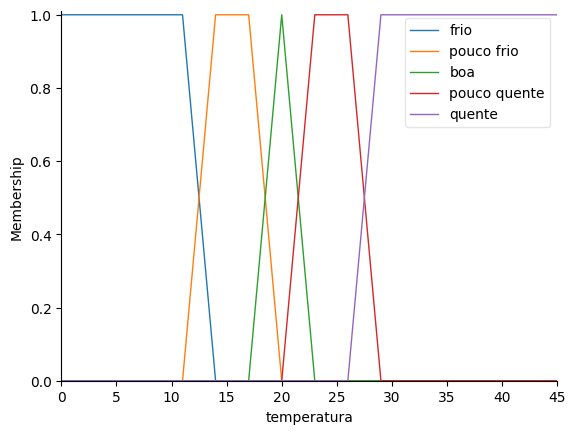

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# New Antecedent/Consequent objects hold universe variables and membership
# functions
temperatura = ctrl.Antecedent(np.arange(0, 46, 1), 'temperatura')
valvula =ctrl.Consequent(np.arange(0, 1.01, .01), 'valvula')

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
temperatura['frio'] = fuzz.trapmf(temperatura.universe, [0, 0, 11,14])
temperatura['pouco frio'] = fuzz.trapmf(temperatura.universe, [11, 14, 17,20])
temperatura['boa'] = fuzz.trimf(temperatura.universe, [17, 20, 23])
temperatura['pouco quente'] = fuzz.trapmf(temperatura.universe, [20, 23, 26,29])
temperatura['quente'] = fuzz.trapmf(temperatura.universe, [26, 29, 45,45])
# You can see how these look with .view()
temperatura.view()


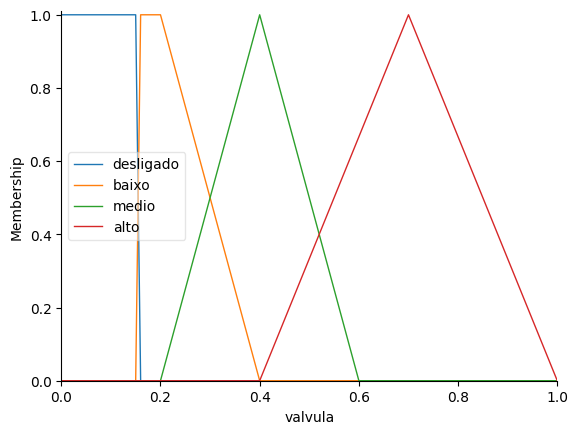

In [3]:
valvula['desligado'] = fuzz.trapmf(valvula.universe, [0,0, .15, .15])
valvula['baixo'] = fuzz.trapmf(valvula.universe, [.16,0.16, 0.2,0.4])
valvula['medio'] = fuzz.trimf(valvula.universe, [0.2, 0.40, 0.60])
valvula['alto'] = fuzz.trimf(valvula.universe, [0.4, 0.70, 1.00])
valvula.view()

In [4]:
regra1 = ctrl.Rule(temperatura['frio'], valvula['alto'])
regra2 = ctrl.Rule(temperatura['pouco frio'], valvula['medio'])
regra3 = ctrl.Rule(temperatura['boa'], valvula['medio'])
regra4 = ctrl.Rule(temperatura['pouco quente'], valvula['baixo'])
regra5 = ctrl.Rule(temperatura['quente'], valvula['desligado'])

In [5]:
valvula_ctrl = ctrl.ControlSystem([regra1, regra2, regra3,regra4,regra5])
abertura = ctrl.ControlSystemSimulation(valvula_ctrl)

0.4


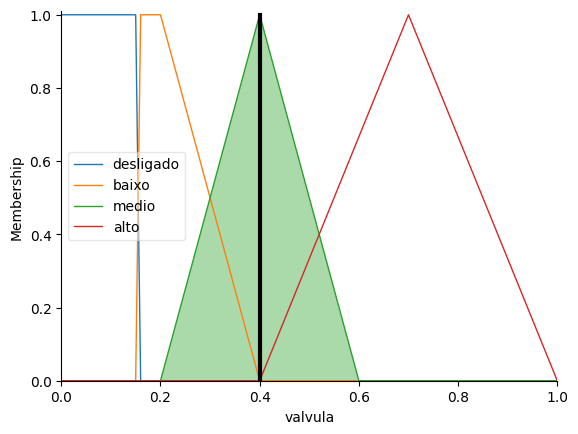

In [8]:
abertura.input['temperatura'] = 17
abertura.compute()
print (abertura.output['valvula'])
valvula.view(sim=abertura)